In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
sns.set_theme(style="whitegrid") #set default seaborn theme

In [2]:
def Black_Scholes_Call(S, K, r, q, T, sigma):
    """Black-Scholes call option price.

    Args:
        S (float): spot price
        K (float): strike price
        r (float): risk-free interest rate
        q (float): dividend yield
        T (float): time to maturity
        sigma (float): volatility

    Returns:
        float: call option price
    """
    if sigma == 0:
        return max(S * np.exp(-q * T) - K * np.exp(-r * T), 0)
    else:
        d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [3]:
def expense_ratio(D, r, sigma, T, tol=1e-6, max_iter=1000):
    """Find the fair expense ratio.

    Args:
        D (float): number of dollars invested
        r (float): risk-free interest rate
        sigma (float): volatility
        T (float): time to maturity
        tol (float, optional): tolerance. Defaults to 1e-6.
        max_iter (int, optional): maximum number of iteration. Defaults to 1000.

    Returns:
        float: fair expense ratio
    """
    # Calculate the fair expense ratio using bisection method
    lower = 0
    upper = 1
    while np.exp(-r * T) * D + np.exp(-upper * T) * D * Black_Scholes_Call(1, np.exp(upper * T), r, 0, T, sigma) - D > 0:
        upper *= 2
    guess = (lower + upper) / 2

    while upper - lower > tol and max_iter > 0:
        diff = np.exp(- r * T) * D + np.exp(- guess * T) * D * \
            Black_Scholes_Call(1, np.exp(guess * T), r, 0, T, sigma) - D
        if diff < 0:
            upper = guess
        else:
            lower = guess
        guess = (lower + upper) / 2
        max_iter -= 1
    return guess

## (a)

In [4]:
# parameters
D = 1  # number of dollars invested
r = 0.01  # risk-free interest rate
sigma = 0.2  # volatility
T = 1  # time to maturity

print("The fair expense ratio is", expense_ratio(D, r, sigma, T))

The fair expense ratio is 0.24877023696899414


## (b)

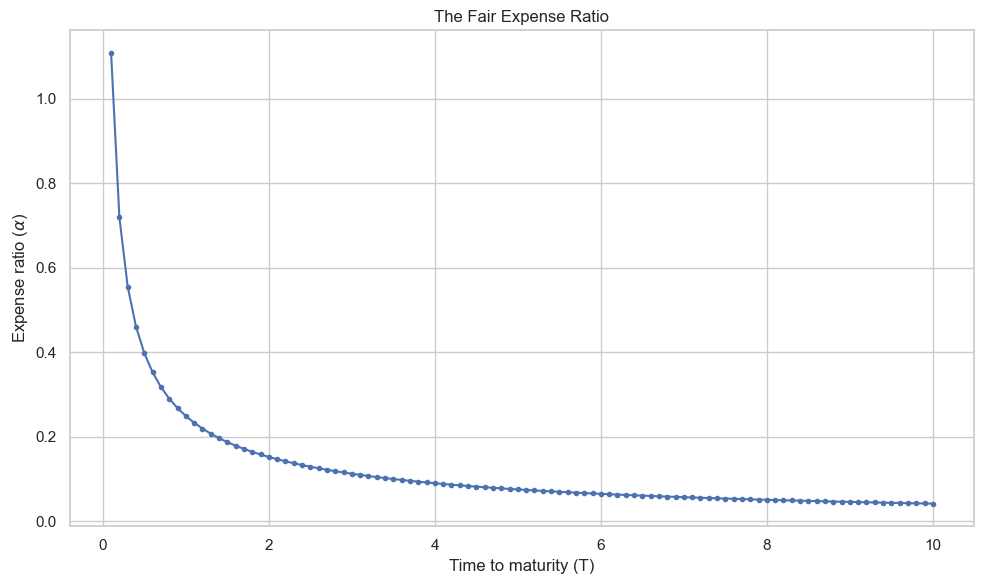

In [5]:
T = np.linspace(0.1, 10, 100)  # time to maturity
alpha = np.array([expense_ratio(D, r, sigma, t, tol=1e-6)
                 for t in T])  # fair expense ratio

# plot
fig, ax = plt.subplots()
ax.plot(T, alpha, "b.-", label=r"$\alpha$")
ax.set_xlabel("Time to maturity (T)")
ax.set_ylabel("Expense ratio" + r" ($\alpha$)")
ax.set_title("The Fair Expense Ratio")
plt.tight_layout()
plt.show()

With the Time to Maturity ($T$) increasing, the Fair Expense Ratio ($\alpha$) will decrease.